In [147]:
import numpy as np
import matplotlib.pyplot as plt

In [148]:
# Generating synthetic dataset from make classification
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(n_features=10,
                           n_samples=1000,
                           n_informative=4,
                           n_redundant=6,
                           n_repeated=0,
                           n_classes=2,
                           random_state=42
                          )

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X is your feature matrix → 1000 rows × 10 columns

y is your label vector → just 1000 labels (0 or 1)

Each row in X represents a data point with 10 features. Each corresponding value in y tells you whether it's class 0 or 1.

In [150]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((750, 10), (250, 10), (750,), (250,))

# Logistic Regression Classifier

In [152]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model = LogisticRegression()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.66      0.69      0.67       122
           1       0.69      0.66      0.68       128

    accuracy                           0.68       250
   macro avg       0.68      0.68      0.68       250
weighted avg       0.68      0.68      0.68       250



here recall is 66 ,means for 100 patients, it is only detecting 66 patients having pneumonia.
here in classification report , the numbers you see are as per 0.5 threshold

In [154]:
X_test.shape

(250, 10)

# interpreting model.predict_proba(X_test)[:,1]

model.predict_proba(X_test) - takes your entire test set X_test and runs it through the model.

For each row (sample), it returns two probabilities: [P(class 0), P(class 1)]

so output shape is (n_samples/rows, 2)

model.predict_proba(X_test)[:,1] ---- This selects the second column (index 1), which is:

The model's predicted probability that each sample belongs to class 1 (the positive class)

So you get a 1D array of class 1 probabilities — one value per test sample.

# interpreting y_pred = (probs > 0.4).astype(int)

probs > 0.4  --  creates a boolean array: [False, True, True, ... ]

It means, if the predicted probability is greater than 0.4, predict class 1, Otherwise, predict class 0

.astype(int) --  Converts True → 1 and False → 0, 
    
So the final result is:  y_pred = [0, 1, 1, ... ]

# By default, models usually use 0.5. Why threshold = 0.4?

But you're lowering the threshold to 0.4, which means:

You're allowing the model to predict 1 (positive) even if it's not super confident.

This will typically increase recall (catch more positives), but may reduce precision (more false positives).

so here y_pred = (probs > 0.4).astype(int) -- “If the probability of class 1 is more than 0.4, predict 1. Otherwise, predict 0.”

In [161]:
probs = model.predict_proba(X_test)[:,1]
y_pred = (probs > 0.4).astype(int)

cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.75      0.57      0.65       122
           1       0.67      0.82      0.74       128

    accuracy                           0.70       250
   macro avg       0.71      0.70      0.69       250
weighted avg       0.71      0.70      0.70       250



Recall with 0.5 threshold is 0.66 
Recall with 0.4 threshold is 0.82

In [163]:
fpr, tpr, thresholds = roc_curve(y_test, probs)

In [164]:
fpr.shape, tpr.shape, thresholds.shape

((96,), (96,), (96,))

The model produced 96 unique probability scores on X_test,

Even though X_test has 1000 rows, the model may predict duplicate probabilities for different rows
— especially with simple models like logistic regression.

The number of unique predicted probability values depend on your X_test data — along with the model itself.

Your model is a mathematical function that takes feature values (X_test) as input and outputs a probability (probs). 

So:

If different samples in X_test have very similar or identical features, the model might output the same predicted probability for them.

If X_test has diverse feature values, you'll get more variation in the predicted probabilities → meaning more unique values.

In [166]:
fpr[:5], tpr[:5], thresholds[:5]

(array([0.        , 0.        , 0.        , 0.00819672, 0.00819672]),
 array([0.       , 0.0078125, 0.265625 , 0.265625 , 0.2890625]),
 array([       inf, 0.97928246, 0.80890214, 0.80840719, 0.80207033]))

In [167]:
tpr   # recall

array([0.       , 0.0078125, 0.265625 , 0.265625 , 0.2890625, 0.2890625,
       0.296875 , 0.296875 , 0.34375  , 0.34375  , 0.3515625, 0.3515625,
       0.375    , 0.375    , 0.3984375, 0.3984375, 0.4296875, 0.4296875,
       0.4375   , 0.4375   , 0.4609375, 0.4609375, 0.46875  , 0.46875  ,
       0.4765625, 0.4765625, 0.484375 , 0.484375 , 0.4921875, 0.4921875,
       0.5078125, 0.5078125, 0.515625 , 0.515625 , 0.5390625, 0.5390625,
       0.5546875, 0.5546875, 0.5859375, 0.5859375, 0.625    , 0.625    ,
       0.640625 , 0.640625 , 0.6484375, 0.6484375, 0.65625  , 0.65625  ,
       0.71875  , 0.71875  , 0.75     , 0.75     , 0.7578125, 0.7578125,
       0.765625 , 0.765625 , 0.7734375, 0.7734375, 0.7890625, 0.7890625,
       0.796875 , 0.796875 , 0.84375  , 0.84375  , 0.8515625, 0.8515625,
       0.859375 , 0.859375 , 0.8671875, 0.8671875, 0.875    , 0.875    ,
       0.8828125, 0.8828125, 0.890625 , 0.890625 , 0.90625  , 0.90625  ,
       0.9140625, 0.9140625, 0.921875 , 0.921875 , 

In [168]:
# so i have to find index of 0.90 value in tpr
desired_recall = 0.9
abs(tpr - desired_recall)

array([0.9      , 0.8921875, 0.634375 , 0.634375 , 0.6109375, 0.6109375,
       0.603125 , 0.603125 , 0.55625  , 0.55625  , 0.5484375, 0.5484375,
       0.525    , 0.525    , 0.5015625, 0.5015625, 0.4703125, 0.4703125,
       0.4625   , 0.4625   , 0.4390625, 0.4390625, 0.43125  , 0.43125  ,
       0.4234375, 0.4234375, 0.415625 , 0.415625 , 0.4078125, 0.4078125,
       0.3921875, 0.3921875, 0.384375 , 0.384375 , 0.3609375, 0.3609375,
       0.3453125, 0.3453125, 0.3140625, 0.3140625, 0.275    , 0.275    ,
       0.259375 , 0.259375 , 0.2515625, 0.2515625, 0.24375  , 0.24375  ,
       0.18125  , 0.18125  , 0.15     , 0.15     , 0.1421875, 0.1421875,
       0.134375 , 0.134375 , 0.1265625, 0.1265625, 0.1109375, 0.1109375,
       0.103125 , 0.103125 , 0.05625  , 0.05625  , 0.0484375, 0.0484375,
       0.040625 , 0.040625 , 0.0328125, 0.0328125, 0.025    , 0.025    ,
       0.0171875, 0.0171875, 0.009375 , 0.009375 , 0.00625  , 0.00625  ,
       0.0140625, 0.0140625, 0.021875 , 0.021875 , 

In [169]:
closest_index = np.argmin(abs(tpr - desired_recall))
closest_index

76

In [170]:
thresholds[closest_index]

0.26349585272229664

In [171]:
#so 0.26 is the threshold where i achieve 0.90 recall
probs = model.predict_proba(X_test)[:,1]
y_pred = (probs > 0.26).astype(int)

cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.74      0.28      0.40       122
           1       0.57      0.91      0.70       128

    accuracy                           0.60       250
   macro avg       0.65      0.59      0.55       250
weighted avg       0.65      0.60      0.56       250



# ROC Curve, FPR, TPR, Thresholds

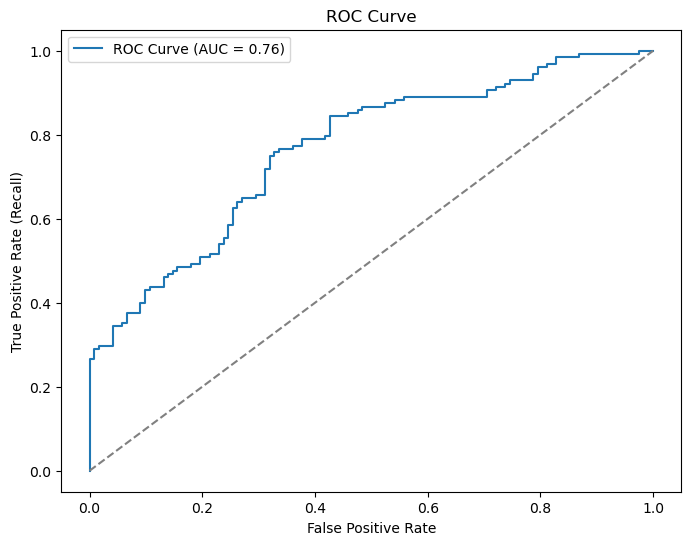

In [173]:
from sklearn.metrics import roc_curve, roc_auc_score

probs = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probs)

auc_score = roc_auc_score(y_test, probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve")
plt.legend()
plt.show()

# XGB Classifier

In [175]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       122
           1       0.93      0.89      0.91       128

    accuracy                           0.91       250
   macro avg       0.91      0.91      0.91       250
weighted avg       0.91      0.91      0.91       250



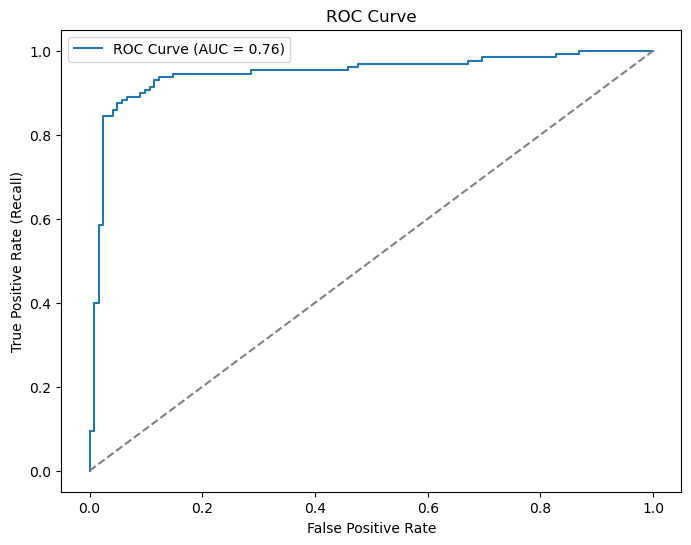

In [176]:
probs_xgb = model.predict_proba(X_test)[:, 1]
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, probs_xgb)

auc_score_xgb = roc_auc_score(y_test, probs_xgb)

plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, label=f"ROC Curve (AUC = {auc_score:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve")
plt.legend()
plt.show()

here aoc is 0.95 which is very good model

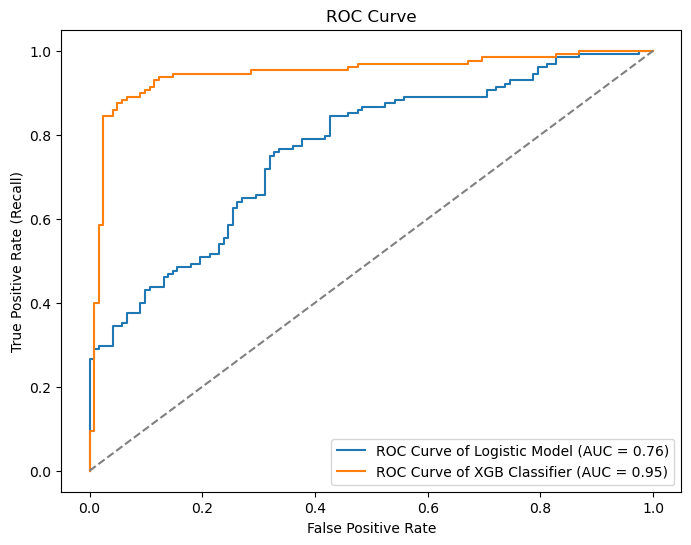

In [200]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve of Logistic Model (AUC = {auc_score:.2f})")
plt.plot(fpr_xgb, tpr_xgb, label=f"ROC Curve of XGB Classifier (AUC = {auc_score_xgb:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve")
plt.legend()
plt.show()

# Finding best threshold to achieve 0.95 recall in XGB Model

In [209]:
# so i have to find index of 0.95 value in tpr
desired_recall_xgb = 0.95
abs(tpr_xgb - desired_recall_xgb)

array([0.95     , 0.9421875, 0.85625  , 0.85625  , 0.746875 , 0.73125  ,
       0.5515625, 0.5515625, 0.3640625, 0.3640625, 0.10625  , 0.10625  ,
       0.090625 , 0.090625 , 0.075    , 0.075    , 0.0671875, 0.0671875,
       0.059375 , 0.059375 , 0.0515625, 0.0515625, 0.04375  , 0.04375  ,
       0.0359375, 0.0359375, 0.0203125, 0.0203125, 0.0125   , 0.0125   ,
       0.0046875, 0.0046875, 0.003125 , 0.003125 , 0.003125 , 0.003125 ,
       0.0109375, 0.0109375, 0.01875  , 0.01875  , 0.0265625, 0.0265625,
       0.034375 , 0.034375 , 0.0421875, 0.0421875, 0.05     , 0.05     ])

In [211]:
closest_index_xgb = np.argmin(abs(tpr_xgb - desired_recall_xgb))
closest_index_xgb

32

In [213]:
thresholds_xgb[closest_index_xgb]

0.01948605

In [215]:
#so 0.01948605 is the threshold where i achieve 0.95 recall in xgb
probs_xgb = model.predict_proba(X_test)[:,1]
y_pred = (probs_xgb > 0.01948605).astype(int)

cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.93      0.71      0.81       122
           1       0.78      0.95      0.85       128

    accuracy                           0.83       250
   macro avg       0.85      0.83      0.83       250
weighted avg       0.85      0.83      0.83       250



# Finding best threshold to achieve 0.92 recall in XGB Model

In [219]:
# so i have to find index of 0.92 value in tpr
desired_recall_xgb = 0.92
abs(tpr_xgb - desired_recall_xgb)

array([0.92     , 0.9121875, 0.82625  , 0.82625  , 0.716875 , 0.70125  ,
       0.5215625, 0.5215625, 0.3340625, 0.3340625, 0.07625  , 0.07625  ,
       0.060625 , 0.060625 , 0.045    , 0.045    , 0.0371875, 0.0371875,
       0.029375 , 0.029375 , 0.0215625, 0.0215625, 0.01375  , 0.01375  ,
       0.0059375, 0.0059375, 0.0096875, 0.0096875, 0.0175   , 0.0175   ,
       0.0253125, 0.0253125, 0.033125 , 0.033125 , 0.033125 , 0.033125 ,
       0.0409375, 0.0409375, 0.04875  , 0.04875  , 0.0565625, 0.0565625,
       0.064375 , 0.064375 , 0.0721875, 0.0721875, 0.08     , 0.08     ])

In [221]:
closest_index_xgb = np.argmin(abs(tpr_xgb - desired_recall_xgb))
closest_index_xgb

24

In [223]:
thresholds_xgb[closest_index_xgb]

0.30599597

In [225]:
#so 00.30599597 is the threshold where i achieve 0.92 recall in xgb
probs_xgb = model.predict_proba(X_test)[:,1]
y_pred = (probs_xgb > 0.30599597).astype(int)

cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.90      0.89      0.90       122
           1       0.90      0.91      0.90       128

    accuracy                           0.90       250
   macro avg       0.90      0.90      0.90       250
weighted avg       0.90      0.90      0.90       250



In [ ]:
Conclusion : with 0.92, recall and precision are much balanced